## This script contains the following points;

### 1. Importing Data and Libraries
### 2. Cleaning Data
       Data Overview
       Consistency Checks; missing values,duplicate values & mixed-type variable
### 3. Descriptive Statistics 
       Mean, std, min, max, frequency etc
       Histograms, bars & scatterplot- overview of insurance and customer data 
       Exploring relationships
### 4. Creating Subset 
### 5. Exporting Data and Visuals

### 1. Importing Data and Libraries

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data
df1 = pd.read_excel(r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON\02. Data\WA_Customers.xlsx', index_col = False)

In [3]:
# Define path
path = r'C:\Users\senja\OneDrive\Documents\5. Learning\6. Data Analytics Immersion\WATSON'

In [4]:
path

'C:\\Users\\senja\\OneDrive\\Documents\\5. Learning\\6. Data Analytics Immersion\\WATSON'

### 2. Cleaning Data

In [5]:
df1.shape

(9134, 20)

In [6]:
df1.head()

,Customer ID,State,Location Code,Customer Lifetime Value,Coverage,Education,Employment Status,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,Suburban,2763.519279,Basic,Bachelor,Employed,F,56274,Married,69,32,5,0,1,Corporate Auto,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,Suburban,6979.535903,Extended,Bachelor,Unemployed,F,0,Single,94,13,42,0,8,Personal Auto,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,Suburban,12887.431650,Premium,Bachelor,Employed,F,48767,Married,108,18,38,0,2,Personal Auto,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,Suburban,7645.861827,Basic,Bachelor,Unemployed,M,0,Married,106,18,65,0,7,Corporate Auto,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,Rural,2813.692575,Basic,Bachelor,Employed,M,43836,Single,73,12,44,0,1,Personal Auto,Agent,138.130879,Four-Door Car,Medsize


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Location Code                  9134 non-null   object 
 3   Customer Lifetime Value        9134 non-null   float64
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Employment Status              9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [8]:
# Check for missing values
df1.isnull().sum()  # No missing values

Customer ID                      0
State                            0
Location Code                    0
Customer Lifetime Value          0
Coverage                         0
Education                        0
Employment Status                0
Gender                           0
Income                           0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [9]:
#Find duplicates
df1_dups = df1[df1.duplicated()]

In [10]:
df1_dups.shape # No duplicates

(0, 20)

In [11]:
#check for mixed-type data
for col in df1.columns.tolist():
      weird = (df1[[col]].applymap(type) != df1[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df1[weird]) > 0:
        print (col) # No mix-type data

### 3. Descriptive Statistics 

In [12]:
# check for mean, std, min & max etc
df1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [13]:
# check for mode etc for categorial data 
df1.describe(include='all')

,Customer ID,State,Location Code,Customer Lifetime Value,Coverage,Education,Employment Status,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134.000000,9134,9134
unique,9134,5,3,NaN,3,5,5,2,NaN,3,NaN,NaN,NaN,NaN,NaN,3,4,NaN,6,3
top,EO99750,California,Suburban,NaN,Basic,Bachelor,Employed,F,NaN,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,5779,NaN,5568,2748,5698,4658,NaN,5298,NaN,NaN,NaN,NaN,NaN,6788,3477,NaN,4621,6424
mean,NaN,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,37657.380009,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,30379.904734,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,0.000000,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,0.000000,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,33889.500000,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,62320.000000,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,547.514839,NaN,NaN


 Histograms & bars - overview of insurance data

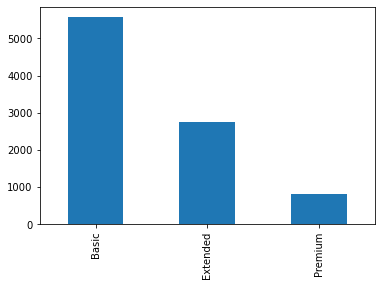

In [14]:
# check for coverage distributions and save the bar
df1['Coverage'].value_counts().plot.bar()
bar1_coverage = df1['Coverage'].value_counts().plot.bar()

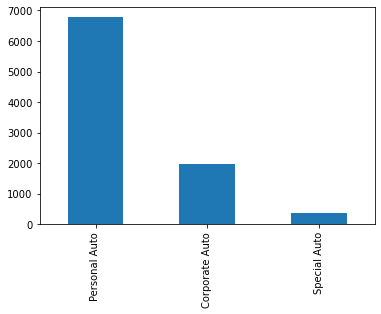

In [15]:
# check for policy distributions and save the bar
df1['Policy Type'].value_counts().plot.bar()
bar2_policy_type = df1['Policy Type'].value_counts().plot.bar()

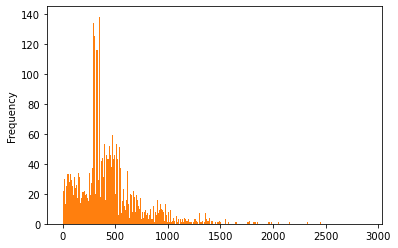

In [16]:
# check for insurance claim distributions and save the histogram
df1['Total Claim Amount'].plot.hist(bins = 1000)
his1_claims = df1['Total Claim Amount'].plot.hist(bins = 1000)

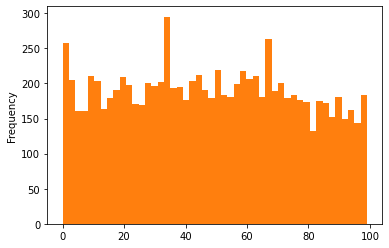

In [17]:
# check for the distribution for the policy lenghts and save the histogram
df1['Months Since Policy Inception'].plot.hist(bins = 48)
his2_policy_lengths = df1['Months Since Policy Inception'].plot.hist(bins = 48)

Bars & scatterplot - overview of customer data 

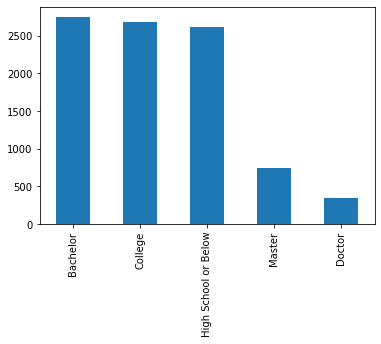

In [18]:
# check for the distributions of customers' education and save the bar
df1['Education'].value_counts().plot.bar()
bar3_education = df1['Education'].value_counts().plot.bar()

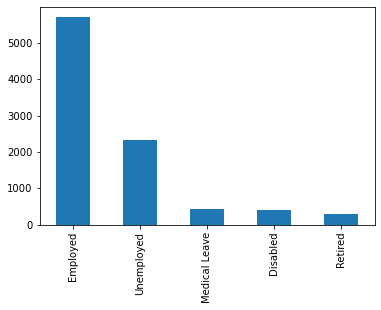

In [19]:
# check for the distributions of customers' employment status and save the bar
df1['Employment Status'].value_counts().plot.bar()
bar4_employment = df1['Employment Status'].value_counts().plot.bar()

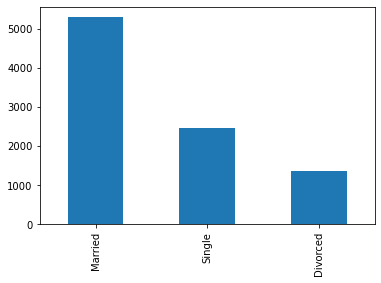

In [20]:
# check for the distributions of customers' marital status and save the bar
df1['Marital Status'].value_counts().plot.bar()
bar5_marital_status = df1['Marital Status'].value_counts().plot.bar()

<AxesSubplot:>

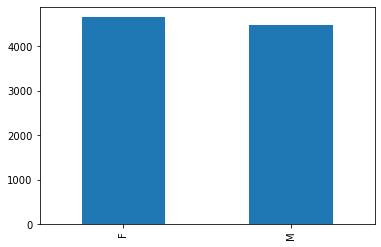

In [21]:
# check for the distributions of customers' gender - not saving
df1['Gender'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

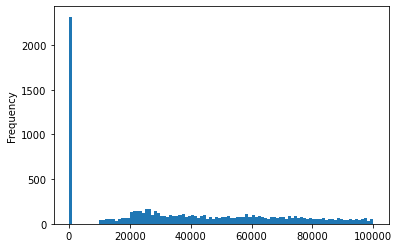

In [22]:
# check for the distribution for income
df1['Income'].plot.hist(bins = 100)

<AxesSubplot:xlabel='Income', ylabel='Income'>

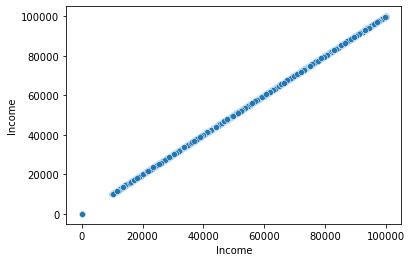

In [23]:
# check any outlines for the customers' incomes - not saving
sns.scatterplot(x = 'Income', y = 'Income' ,data = df1)

Exploring relationships

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Monthly Premium Auto'>

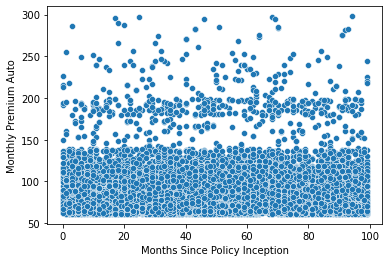

In [24]:
# check relationship between the lenght of policy and monthly payment
sns.scatterplot(x = 'Months Since Policy Inception' , y = 'Monthly Premium Auto' ,data = df1)

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Monthly Premium Auto'>

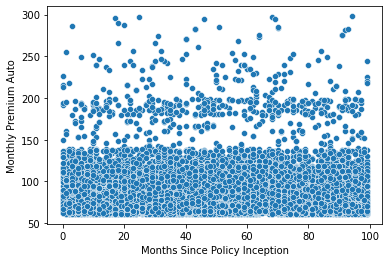

In [25]:
# check relationship between the lenght of policy and monthly payment
sns.scatterplot(x = 'Months Since Policy Inception' , y = 'Monthly Premium Auto' ,data = df1)

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Income'>

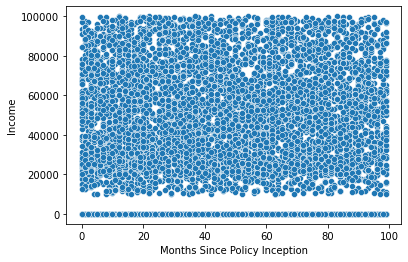

In [26]:
# check relationship between the lenght of policy and income
sns.scatterplot(x = 'Months Since Policy Inception' , y = 'Income' ,data = df1)

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Income'>

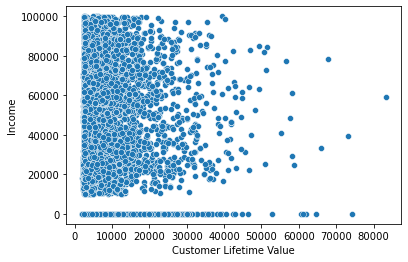

In [27]:
# check relationship between income and customer liferime value 
sns.scatterplot(x = 'Customer Lifetime Value', y = 'Income' ,data = df1)

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Monthly Premium Auto'>

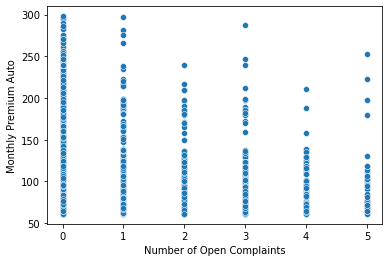

In [28]:
# check relationship between the lenght of policy and number of policies
sns.scatterplot(x = 'Number of Open Complaints' , y = 'Monthly Premium Auto' ,data = df1)

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Number of Policies'>

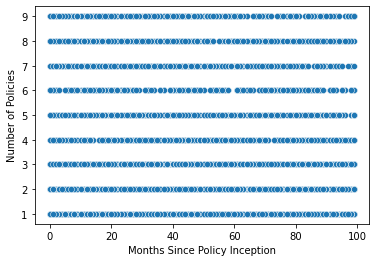

In [29]:
# check relationship between the lenght of policy and number of policies
sns.scatterplot(x = 'Months Since Policy Inception' , y = 'Number of Policies' ,data = df1)

<AxesSubplot:xlabel='Income', ylabel='Total Claim Amount'>

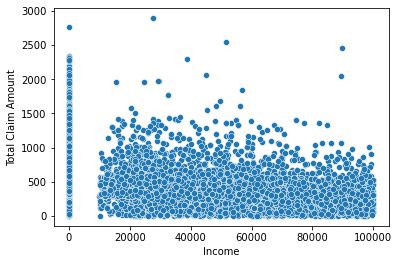

In [30]:
# check relationship between the incomes and the total claim amounts
sns.scatterplot(x = 'Income' , y = 'Total Claim Amount' ,data = df1)

<AxesSubplot:xlabel='Number of Open Complaints', ylabel='Total Claim Amount'>

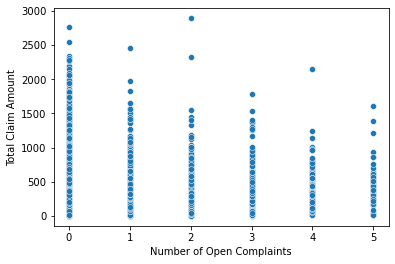

In [31]:
# check relationship between income and the total claims
sns.scatterplot(x = 'Number of Open Complaints', y = 'Total Claim Amount' ,data = df1)

### 4. Creating Subset 

Creating subset for customers who have not told their income or income = 0

In [32]:
print(df1['Income'].value_counts(),'\n')

0        2317
95697      12
26876       7
61108       7
25965       7
         ... 
36259       1
69011       1
38638       1
30092       1
51199       1
Name: Income, Length: 5694, dtype: int64 



In [33]:
# create a subset excluding the customers who have not given income / income = 0 
sub = df1[df1['Income'] != 0]

In [34]:
print(sub['Income'].value_counts(),'\n')

95697    12
25965     7
33190     7
40864     7
61108     7
         ..
21235     1
62370     1
68332     1
39658     1
51199     1
Name: Income, Length: 5693, dtype: int64 



In [35]:
# check for subset dataframe statistics
sub.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,8130.229340,50456.580461,92.963034,15.046941,47.832624,0.381840,2.951005,377.840789
std,6949.067972,24305.956566,34.615160,10.064762,27.895350,0.905048,2.390613,252.648952
min,2119.894333,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4090.750678,28432.000000,68.000000,6.000000,24.000000,0.000000,1.000000,210.100003
50%,5810.630529,48081.000000,83.000000,14.000000,48.000000,0.000000,2.000000,340.800000
75%,9075.768214,70187.000000,109.000000,23.000000,71.000000,0.000000,4.000000,498.612632
max,83325.381190,99981.000000,297.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 5. Exporting Data and Visuals

In [36]:
sub.to_excel(os.path.join(path, '02. Data', 'WA_Customers_no_income.xlsx'))

In [37]:
bar1_coverage.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar1_coverage.png'))

In [38]:
bar2_policy_type.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar2_policy_type.png'))

In [1]:
his1_claims.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'his1_claims.png'))

NameError: name 'his1_claims' is not defined

In [40]:
his2_policy_lengths.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'his2_policy_lengths'))

In [41]:
bar3_education.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar3_education'))

In [42]:
bar4_employment.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar4_employment'))

In [43]:
bar5_marital_status.figure.savefig(os.path.join(path, '04. Analysis','Visualisations', 'bar5_marital_status'))